In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
from tqdm import tqdm

import evaluation_class

In [2]:
def transform_input(input, new_size):
    new_image = np.full((new_size), -1, dtype=np.float32)
    #norm the values to -1 to 1 is already done
    input = np.array(input).reshape(5,5)
    rows, cols = input.shape
    # Calculate the starting indices to center the 5x5 image in the new array
    start_row = (new_size[0] - rows) // 2  # Start at row 2
    start_col = (new_size[1] - cols) // 2  # Start at column 2
    # Place the 5x5 image in the center of the new image
    new_image[start_row:start_row+rows, start_col:start_col+cols] = input
    return np.array(new_image)

# Evaluate Formulas with Paceval

In [3]:
import paceval
import json
from types import SimpleNamespace

In [4]:
#get input variable names
with open('formulas/paceval_variablesString.txt', 'r') as file:
    data = file.read()

# Split the data into a list of elements using whitespace as the separator
input_list = data.split()

input_variable_names = ""
for x in input_list:
    input_variable_names += f"{x};"
input_variable_names = input_variable_names[:-1]
print(input_variable_names)

in_1;in_2;in_3;in_4;in_5;in_6;in_7;in_8;in_9;in_10;in_11;in_12;in_13;in_14;in_15;in_16;in_17;in_18;in_19;in_20;in_21;in_22;in_23;in_24;in_25;in_26;in_27;in_28;in_29;in_30;in_31;in_32;in_33;in_34;in_35;in_36;in_37;in_38;in_39;in_40;in_41;in_42;in_43;in_44;in_45;in_46;in_47;in_48;in_49;in_50;in_51;in_52;in_53;in_54;in_55;in_56;in_57;in_58;in_59;in_60;in_61;in_62;in_63;in_64;in_65;in_66;in_67;in_68;in_69;in_70;in_71;in_72;in_73;in_74;in_75;in_76;in_77;in_78;in_79;in_80;in_81;in_82;in_83;in_84;in_85;in_86;in_87;in_88;in_89;in_90;in_91;in_92;in_93;in_94;in_95;in_96;in_97;in_98;in_99;in_100;in_101;in_102;in_103;in_104;in_105;in_106;in_107;in_108;in_109;in_110;in_111;in_112;in_113;in_114;in_115;in_116;in_117;in_118;in_119;in_120;in_121;in_122;in_123;in_124;in_125;in_126;in_127;in_128;in_129;in_130;in_131;in_132;in_133;in_134;in_135;in_136;in_137;in_138;in_139;in_140;in_141;in_142;in_143;in_144;in_145;in_146;in_147;in_148;in_149;in_150;in_151;in_152;in_153;in_154;in_155;in_156;in_157;in_158;in

In [5]:
#get hidden layer output variable names
with open('formulas/paceval_layerVariableNames.txt', 'r') as file:
    data = file.read()

# Split the data into a list of elements using whitespace as the separator
hidden_output_list = data.split()
hidden_output_list = hidden_output_list[:-4]
print(hidden_output_list)
hidden_output_variable_names = ""
for x in hidden_output_list:
    hidden_output_variable_names += f"{x};"
hidden_output_variable_names = hidden_output_variable_names[:-1]
print(hidden_output_variable_names)

['l1_1', 'l1_2', 'l1_3', 'l1_4', 'l1_5', 'l1_6', 'l1_7', 'l1_8', 'l1_9', 'l1_10', 'l1_11', 'l1_12', 'l1_13', 'l1_14', 'l1_15', 'l1_16', 'l1_17', 'l1_18', 'l1_19', 'l1_20', 'l1_21', 'l1_22', 'l1_23', 'l1_24', 'l1_25', 'l1_26', 'l1_27', 'l1_28', 'l1_29', 'l1_30', 'l1_31', 'l1_32', 'l1_33', 'l1_34', 'l1_35', 'l1_36', 'l1_37', 'l1_38', 'l1_39', 'l1_40', 'l1_41', 'l1_42', 'l1_43', 'l1_44', 'l1_45', 'l1_46', 'l1_47', 'l1_48', 'l1_49', 'l1_50', 'l1_51', 'l1_52', 'l1_53', 'l1_54', 'l1_55', 'l1_56', 'l1_57', 'l1_58', 'l1_59', 'l1_60', 'l1_61', 'l1_62', 'l1_63', 'l1_64', 'l1_65', 'l1_66', 'l1_67', 'l1_68', 'l1_69', 'l1_70', 'l1_71', 'l1_72', 'l1_73', 'l1_74', 'l1_75', 'l1_76', 'l1_77', 'l1_78', 'l1_79', 'l1_80', 'l1_81', 'l1_82', 'l1_83', 'l1_84', 'l1_85', 'l1_86', 'l1_87', 'l1_88', 'l1_89', 'l1_90', 'l1_91', 'l1_92', 'l1_93', 'l1_94', 'l1_95', 'l1_96', 'l1_97', 'l1_98', 'l1_99', 'l1_100', 'l1_101', 'l1_102', 'l1_103', 'l1_104', 'l1_105', 'l1_106', 'l1_107', 'l1_108', 'l1_109', 'l1_110', 'l1_111

# Create the formulas from first to second layer in paceval 

In [6]:

url = "https://paceval-service.cloud"
# Path to the directory containing text files
directory_path = 'formulas'

# dict of all formulas
paceval_functions_hidden_layer = {}

# Iterate over all files in the directory
for filename in tqdm(os.listdir(directory_path)):
    # Check if the file is a text file
    if filename.endswith('.txt') and filename.startswith('l1_'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        
        # Open the file and read its content
        with open(file_path, 'r') as file:
            content = file.read()
            paceval_functions_hidden_layer[f"function_{filename}"] = paceval.CreateComputation(url, f"{content}", f"{len(input_list)}", f"{input_variable_names}", "no").text


100%|██████████| 309/309 [03:46<00:00,  1.36it/s]


In [7]:
paceval_functions_hidden_layer_ids = ""
for function in paceval_functions_hidden_layer.values():
    #rewrite response to python object 
    ResponseObject = json.loads(function,object_hook = lambda  d: SimpleNamespace(**d))
    paceval_functions_hidden_layer_ids += ResponseObject.handle_pacevalComputation + ";"
paceval_functions_hidden_layer_ids = paceval_functions_hidden_layer_ids[:-1]
print(paceval_functions_hidden_layer_ids)

5065693072;5065695456;5065722400;5601535136;5065721040;5065747552;5601533616;5601542400;5601584208;5064640128;5065792496;4817182512;5065795728;5602587632;5601600480;5064662016;5065809584;5065808336;5065880640;5601598320;5065791520;5065840864;5065909184;5601627200;5065931360;5601678128;5065903904;5064664864;5064672160;5601688752;5601675024;5064721248;5601653696;5065904944;5064733552;5065948400;5065871952;5601691408;5064792992;5602609168;5601715968;5601794816;5064783568;5065960848;4820322208;5601747536;5601772704;5066024448;5064792000;5066042720;5064769328;5066018640;5602616528;5601815536;5066041680;5065933264;5601812336;4796264208;4817177424;5601527552;5065934320;5064824832;5602683664;5065799712;5065722080;5064819712;5064660112;4821400544;5601542064;5064858960;5602682624;5066091664;5066152160;5066137344;5066183744;5064863184;5064888112;5066174624;5064691072;5066154800;5601909424;5602592736;5601883040;5602668448;5601652176;5601874304;5064949648;5066161104;5601763728;4796277424;5065938368

In [8]:
#save the layer ids as txt
file_path = "formulas/hidden_layer_ids.txt"
with open(file_path, 'w') as file:
    file.write(paceval_functions_hidden_layer_ids)

# Create the formulas from second to third (output) layer in paceval 

In [9]:
paceval_functions_output_layer = {}
# Iterate over all files in the directory
for filename in tqdm(os.listdir(directory_path)):
    # Check if the file is a text file
    if filename.endswith('.txt') and filename.startswith('out_'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        
        # Open the file and read its content
        with open(file_path, 'r') as file:
            content = file.read()
            paceval_functions_output_layer[f"function_{filename}"] = paceval.CreateComputation(url, f"{content}", f"{len(hidden_output_list)}", f"{hidden_output_variable_names}", "no").text

100%|██████████| 309/309 [00:01<00:00, 162.94it/s]


In [10]:
paceval_functions_output_layer_ids = ""
for function in paceval_functions_output_layer.values():
    #rewrite response to python object 
    ResponseObject = json.loads(function,object_hook = lambda  d: SimpleNamespace(**d))
    paceval_functions_output_layer_ids += ResponseObject.handle_pacevalComputation + ";" 
paceval_functions_output_layer_ids = paceval_functions_output_layer_ids[:-1]
print(paceval_functions_output_layer_ids)

4794148528;5602814016;5065822416;4795241152


# Optional: Save the ID's of the Formulas

In [11]:
#save the layer ids as txt
file_path = "formulas/output_layer_ids.txt"
with open(file_path, 'w') as file:
    file.write(paceval_functions_output_layer_ids)

# Load the IDs

In [12]:
with open("formulas/hidden_layer_ids.txt", 'r') as file:
    paceval_functions_hidden_layer_ids = file.read()

with open("formulas/output_layer_ids.txt", 'r') as file:
    paceval_functions_output_layer_ids = file.read()

print(paceval_functions_hidden_layer_ids)

5065693072;5065695456;5065722400;5601535136;5065721040;5065747552;5601533616;5601542400;5601584208;5064640128;5065792496;4817182512;5065795728;5602587632;5601600480;5064662016;5065809584;5065808336;5065880640;5601598320;5065791520;5065840864;5065909184;5601627200;5065931360;5601678128;5065903904;5064664864;5064672160;5601688752;5601675024;5064721248;5601653696;5065904944;5064733552;5065948400;5065871952;5601691408;5064792992;5602609168;5601715968;5601794816;5064783568;5065960848;4820322208;5601747536;5601772704;5066024448;5064792000;5066042720;5064769328;5066018640;5602616528;5601815536;5066041680;5065933264;5601812336;4796264208;4817177424;5601527552;5065934320;5064824832;5602683664;5065799712;5065722080;5064819712;5064660112;4821400544;5601542064;5064858960;5602682624;5066091664;5066152160;5066137344;5066183744;5064863184;5064888112;5066174624;5064691072;5066154800;5601909424;5602592736;5601883040;5602668448;5601652176;5601874304;5064949648;5066161104;5601763728;4796277424;5065938368

# Evaluate the Formulas by building a function to query the formulas with an input forecast

In [13]:
#reorder the results
def reorder_results(results, number_forecasts):
    results_reordered = []
    for offset in range(number_forecasts):
        off_ls = results[offset:len(results):number_forecasts]
        results_reordered.append(off_ls)
    return np.array(results_reordered).flatten()

In [14]:
def query_the_formulas(forecasts):
    #split up the calculation so the input to the paceval server doesnt get too large
    splittet_results = []
    length_to_split = 700
    if len(forecasts)>length_to_split:
        splittet_results = query_the_formulas(forecasts[length_to_split:])
    forecasts = forecasts[:length_to_split]
    #transform the input
    input_forecasts = ""
    for forecast in forecasts:
        input_forecast = transform_input(forecast, (20,20)).flatten()
        #transform to string
        input_values = ""
        for x in input_forecast:
            input_values += f"{x};"
        input_values = input_values[:-1]
        
        input_forecasts += input_values + ";"
    input_forecasts = input_forecasts[:-1]
    #input the input_vales to the hidden layer and get the output
    amount_functions_hidden = paceval_functions_hidden_layer_ids.count(';')+1
    #retry if connection error occurs
    while True:
        try: 
            hidden_layer_response = paceval.GetMultipleComputationsResultsExt(url, paceval_functions_hidden_layer_ids, amount_functions_hidden, len(forecasts), input_forecasts).text
            hidden_layer_ResponseObject = json.loads(hidden_layer_response,object_hook = lambda  d: SimpleNamespace(**d))
            hidden_layer_results = hidden_layer_ResponseObject.results
            #print(hidden_layer_ResponseObject.__dict__["time-calculate"])
            break
        except Exception as e:
            try: 
                print(output_layer_response)
                print(e)
            except: print(e)
            
    #transform the hidden layer output
    hidden_layer_results = reorder_results(hidden_layer_results, len(forecasts))
    hidden_output_values = ""
    for x in hidden_layer_results:
        hidden_output_values += f"{x};"
    hidden_output_values = hidden_output_values[:-1]
    
    #give the values as input to the output layer formulas
    amount_functions_output = paceval_functions_output_layer_ids.count(';')+1
    #retry if connection error occurs
    while True:
        try:
            output_layer_response = paceval.GetMultipleComputationsResultsExt(url, paceval_functions_output_layer_ids, amount_functions_output, len(hidden_layer_results)/amount_functions_hidden, hidden_output_values).text
            output_layer_ResponseObject = json.loads(output_layer_response,object_hook = lambda  d: SimpleNamespace(**d)) 
            output_layer_results = output_layer_ResponseObject.results
            # print the time that is needed to calculate if wanted
            #print(output_layer_ResponseObject.__dict__["time-calculate"])
            break
        except Exception as e:
            try: 
                print(output_layer_response)
                print(e)
                #print(output_layer_ResponseObject)
            except: 
                print(e)
            return
    #transform the final output to floats and in a lists of 4 values (only if needed)
    final_result = []
    one_result = []
    output_layer_results = reorder_results(output_layer_results, len(forecasts))
    for i, x in enumerate(output_layer_results):
        one_result.append(float(x))
        if (i+1) % 4 == 0:
            final_result.append(one_result)
            one_result = []

    #decide, which results to be the score, 0 circle, 1 square, 2 triangle, 3 star
    final_result = [x[0] for x in final_result] # choosing circle, because i=0
    
    #append the results that were calculated separately
    final_result = final_result + splittet_results

    return final_result

# Use a python class that evaluates the formulas

In [15]:
formula_evaluator = evaluation_class.Formula_Evaluator(0.05, query_the_formulas, 25)

100%|██████████| 25/25 [30:46<00:00, 73.85s/it]

[{0.1: [7.00548677633759e-10, 7.00548677633759e-10], 0.2: [6.82398763384323e-10, 6.88656512272315e-10], 0.3: [7.01151764948896e-10, 7.1208102488513e-10], 0.4: [6.86029835698773e-10, 7.05736458413258e-10], 0.5: [7.17727465969134e-10, 6.60084142567935e-10], 0.6: [7.82911810690394e-10, 7.1388724070928e-10], 0.7: [7.14120654969538e-10, 7.28466258703309e-10], 0.8: [6.84676180582172e-10, 6.56489967265815e-10], 0.9: [6.40588722025612e-10, 6.82532600304568e-10], 1.0: [6.85194126342951e-10, 7.68480587761511e-10], 1.1: [7.0327773546847e-10, 7.32870192775435e-10], 1.2: [6.00276843123822e-10, 6.69828612866194e-10], 1.3: [6.34387592037434e-10, 6.26735996083305e-10], 1.4: [6.45754994391309e-10, 7.62433214718168e-10], 1.5: [7.70426530749882e-10, 7.33256770944978e-10], 1.6: [7.15789291960012e-10, 6.90522707116533e-10], 1.7: [7.0875979467414e-10, 8.35448244191928e-10], 1.8: [6.57764813457673e-10, 6.890167760118e-10], 1.9: [5.99170316355051e-10, 7.77978392739834e-10], 2.0: [6.66589601400736e-10, 8.21870

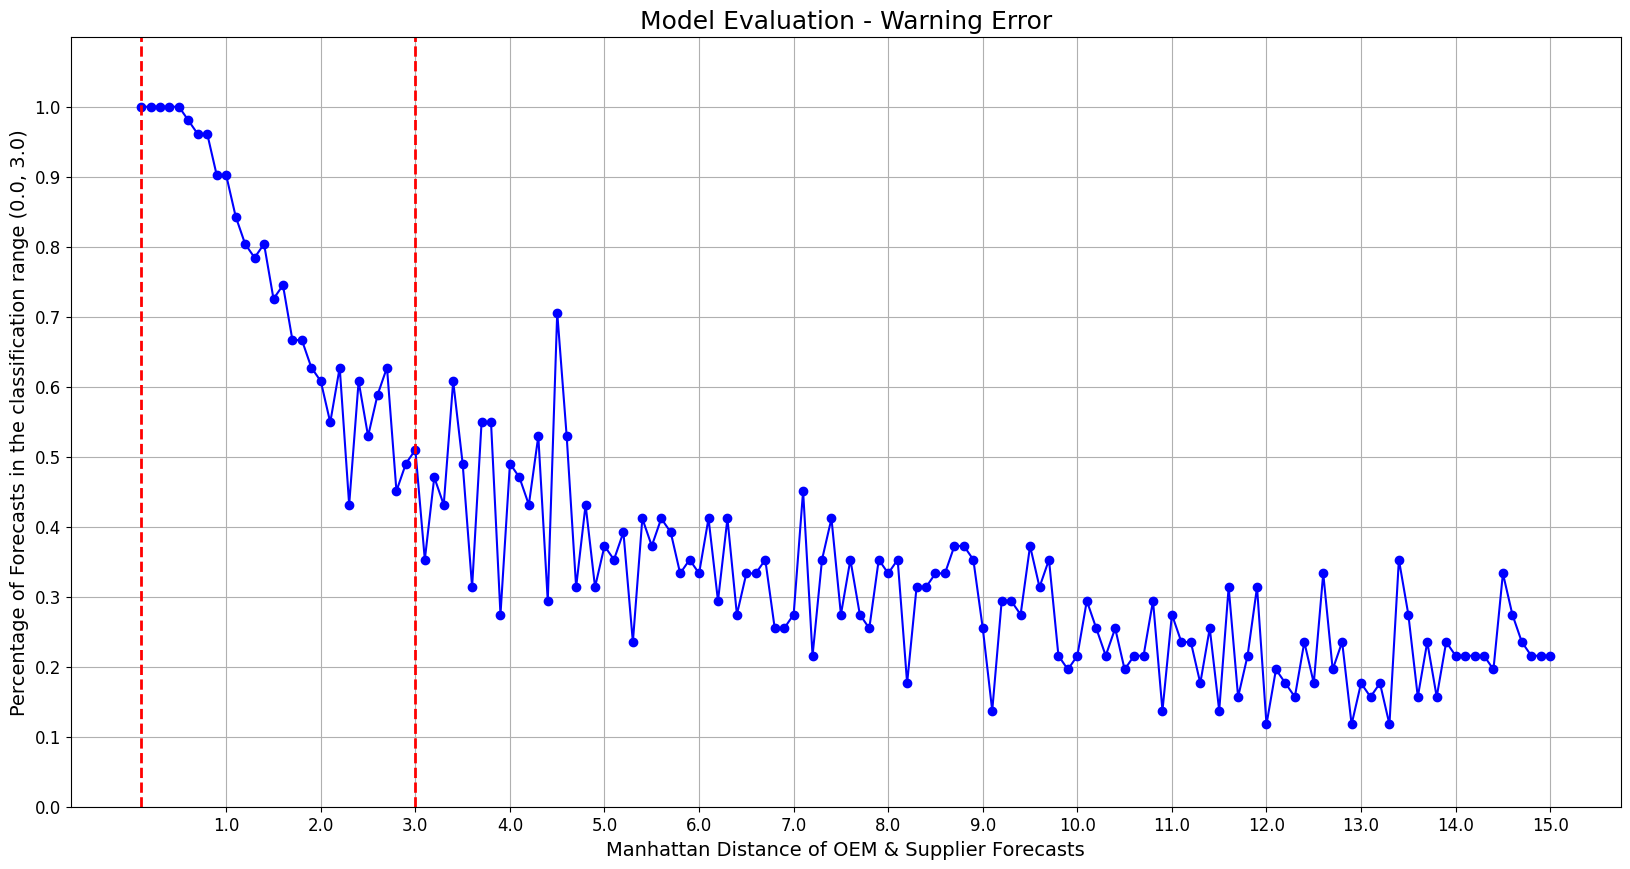

In [16]:
result_df_square = formula_evaluator.visualize_warning_error(formula_evaluator.df, "0.0", "3.0")